# RFM MODEL:- 

In [537]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# LABELLING TRAINING DATA USING RFM MODEL

Recency, Frequency and Monetary (Profit Margin) are the calculated fields that were created in the Tableau Prep Builder.
- Recency - Is the number of days from the last transaction made by the customer.
- Frequency - Number of Transactions the customer has made during the period of consideration. 
- Monetary- Profit amount from all the transactions made by the customer.

In [538]:
RFM=pd.read_excel(r"C:\Users\Vicky Yewle\Downloads\KPMG INTERNSHIP\TASK 2\RFM Analysis.xlsx")
RFM.head()

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,deceased_indicator,owns_car,tenure,count transaction_id,list_price,standard_cost,Age,Recency,Frequency,Margin(Monetary)
0,2322,496 Summit Road,2120,NSW,Australia,10,Hazlett,Rosenschein,Male,72,...,N,Yes,2,4,4035.51,1450.36,28,67,4,2585.15
1,2278,31953 Dixon Way,2580,NSW,Australia,4,Gerri,Heliet,Male,11,...,N,Yes,8,4,1635.24,1355.46,42,34,4,279.78
2,1052,06 Declaration Hill,3184,VIC,Australia,11,Dela,Flannigan,Female,31,...,N,No,3,6,8478.41,5218.09,34,0,6,3260.32
3,2066,9 Logan Court,2570,NSW,Australia,9,Skipp,McLarens,Male,91,...,N,Yes,12,5,6115.09,3855.80,50,90,5,2259.29
4,2838,50469 Shelley Avenue,4350,QLD,Australia,8,Lydie,Scholfield,Female,14,...,N,No,21,3,2838.62,1284.28,43,15,3,1554.34


In [539]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2519 entries, 0 to 2518
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2519 non-null   int64  
 1   address                              2519 non-null   object 
 2   postcode                             2519 non-null   int64  
 3   state                                2519 non-null   object 
 4   country                              2519 non-null   object 
 5   property_valuation                   2519 non-null   int64  
 6   first_name                           2519 non-null   object 
 7   last_name                            2443 non-null   object 
 8   gender                               2519 non-null   object 
 9   past_3_years_bike_related_purchases  2519 non-null   int64  
 10  job_title                            2519 non-null   object 
 11  job_industry_category         

In [540]:
col=['customer_id','address','postcode','first_name','last_name','country','deceased_indicator','job_title']

In [541]:
for cols in col:
    del RFM[cols]

In [542]:
#hence as we can see that all columns contain equal no of values ie. 2519 non-null values so we can say that there is no NA inside the data.

## Dividing the Dataset into RFM segments:-

Dividing the data into quartiles using the qcut method.
Scores are given from 1-4 ranging from Best to Worst respectively.


- Most Recent Customer will get a score of 1.  
- Most Frequent customer will get a score of 1.
- The customer who made purchases worth more monetary terms gets a score of 1.

- Below are the quartiles for all the three columns. Have a look at the r_quartile, f_quartile and m_quartile to understand how the scores are being assigned with respect to the quartile values.

In [543]:
quartiles = RFM[['Recency','Frequency','Margin(Monetary)']].quantile(q=[0.25,0.50,0.75])
print(quartiles)

      Recency  Frequency  Margin(Monetary)
0.25     18.0        4.0          1766.355
0.50     45.0        5.0          2785.040
0.75     88.0        7.0          4063.625


In [544]:
RFM['r_quartile'] = pd.qcut(RFM['Recency'], 4, ['1','2','3','4'])
RFM['f_quartile'] = pd.qcut(RFM['Frequency'], 4, ['4','3','2','1'] )
RFM['m_quartile'] = pd.qcut(RFM['Margin(Monetary)'], 4, ['4','3','2','1'])

In [545]:
RFM['RFM_Score'] = RFM.r_quartile.astype(str)+ RFM.f_quartile.astype(str) + RFM.m_quartile.astype(str)
RFM.head()

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,count transaction_id,list_price,standard_cost,Age,Recency,Frequency,Margin(Monetary),r_quartile,f_quartile,m_quartile,RFM_Score
0,NSW,10,Male,72,Health,Mass Customer,Yes,2,4,4035.51,1450.36,28,67,4,2585.15,3,4,3,343
1,NSW,4,Male,11,Health,Affluent Customer,Yes,8,4,1635.24,1355.46,42,34,4,279.78,2,4,4,244
2,VIC,11,Female,31,Financial Services,High Net Worth,No,3,6,8478.41,5218.09,34,0,6,3260.32,1,2,2,122
3,NSW,9,Male,91,Health,High Net Worth,Yes,12,5,6115.09,3855.80,50,90,5,2259.29,4,3,3,433
4,QLD,8,Female,14,Retail,High Net Worth,No,21,3,2838.62,1284.28,43,15,3,1554.34,1,4,4,144


In [546]:
#
#4 1
#3 2
#2 3
#1 4

#['111','112','121','211','122','212','221','222','311','312','321','322' ]

In [547]:
def RFMlabel(x):
    if (x['RFM_Score'] in ['111','112','113','114','121','131','141','122','123','124','132','133','134','142','143','144']): 
        return "Gold_customer"
    
    elif(x['RFM_Score'] in ['211','212','213','214','221','231','241','222','223','224','232','233','234','242','243','244']):
        return "Platinum_customer"
    
    elif(x['RFM_Score'] in ['311','312','313','314','321','331','341','322','323','324','332','333','334','342','343','344']):
        return "Silver_customer"
    else:
        return "Uranium_customer"

In [548]:
rfmSeg = RFM
rfmSeg['R_label'] = rfmSeg.apply(RFMlabel,axis=1)
rfmSeg.head()

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,count transaction_id,list_price,standard_cost,Age,Recency,Frequency,Margin(Monetary),r_quartile,f_quartile,m_quartile,RFM_Score,R_label
0,NSW,10,Male,72,Health,Mass Customer,Yes,2,4,4035.51,1450.36,28,67,4,2585.15,3,4,3,343,Silver_customer
1,NSW,4,Male,11,Health,Affluent Customer,Yes,8,4,1635.24,1355.46,42,34,4,279.78,2,4,4,244,Platinum_customer
2,VIC,11,Female,31,Financial Services,High Net Worth,No,3,6,8478.41,5218.09,34,0,6,3260.32,1,2,2,122,Gold_customer
3,NSW,9,Male,91,Health,High Net Worth,Yes,12,5,6115.09,3855.80,50,90,5,2259.29,4,3,3,433,Uranium_customer
4,QLD,8,Female,14,Retail,High Net Worth,No,21,3,2838.62,1284.28,43,15,3,1554.34,1,4,4,144,Gold_customer


In [549]:
rfmSeg.groupby('R_label').count()

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,count transaction_id,list_price,standard_cost,Age,Recency,Frequency,Margin(Monetary),r_quartile,f_quartile,m_quartile,RFM_Score
R_label,,,,,,,,,,,,,,,,,,,
Gold_customer,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
Platinum_customer,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630
Silver_customer,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622
Uranium_customer,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628


In [550]:
RFM['Age']=pd.cut(RFM.Age,bins=[15,35,50,90],labels=['Young Adults','Middle Age','Older'])

In [551]:
RFM.head()

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,count transaction_id,list_price,standard_cost,Age,Recency,Frequency,Margin(Monetary),r_quartile,f_quartile,m_quartile,RFM_Score,R_label
0,NSW,10,Male,72,Health,Mass Customer,Yes,2,4,4035.51,1450.36,Young Adults,67,4,2585.15,3,4,3,343,Silver_customer
1,NSW,4,Male,11,Health,Affluent Customer,Yes,8,4,1635.24,1355.46,Middle Age,34,4,279.78,2,4,4,244,Platinum_customer
2,VIC,11,Female,31,Financial Services,High Net Worth,No,3,6,8478.41,5218.09,Young Adults,0,6,3260.32,1,2,2,122,Gold_customer
3,NSW,9,Male,91,Health,High Net Worth,Yes,12,5,6115.09,3855.80,Middle Age,90,5,2259.29,4,3,3,433,Uranium_customer
4,QLD,8,Female,14,Retail,High Net Worth,No,21,3,2838.62,1284.28,Middle Age,15,3,1554.34,1,4,4,144,Gold_customer


In [552]:
RFM.groupby('R_label').count()

,state,property_valuation,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,count transaction_id,list_price,standard_cost,Age,Recency,Frequency,Margin(Monetary),r_quartile,f_quartile,m_quartile,RFM_Score
R_label,,,,,,,,,,,,,,,,,,,
Gold_customer,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639,639
Platinum_customer,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630,630
Silver_customer,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622,622
Uranium_customer,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628,628


In [553]:
RFM['Age'] = RFM['Age'].astype(str)
RFM['r_quartile'] = RFM['r_quartile'].astype(str)
RFM['f_quartile'] = RFM['f_quartile'].astype(str)
RFM['m_quartile'] = RFM['m_quartile'].astype(str)

In [554]:
RFM.dtypes

state                                   object
property_valuation                       int64
gender                                  object
past_3_years_bike_related_purchases      int64
job_industry_category                   object
wealth_segment                          object
owns_car                                object
tenure                                   int64
count transaction_id                     int64
list_price                             float64
standard_cost                          float64
Age                                     object
Recency                                  int64
Frequency                                int64
Margin(Monetary)                       float64
r_quartile                              object
f_quartile                              object
m_quartile                              object
RFM_Score                               object
R_label                                 object
dtype: object

### Data Preprocessing

Let Extract the columns of object datatype and numeric datatype

In [555]:
#There seems to be no NA in data however there are certain columns that needs transformation, lets look at all of them
RFM_object = RFM.select_dtypes(include=[object])
RFM_num = RFM.select_dtypes(exclude=[object])

In [556]:
RFM_object.columns

Index(['state', 'gender', 'job_industry_category', 'wealth_segment',
       'owns_car', 'Age', 'r_quartile', 'f_quartile', 'm_quartile',
       'RFM_Score', 'R_label'],
      dtype='object')

In [557]:
for cols in RFM_object.columns:
    print(RFM_object[cols].value_counts())
    print('------------------------------')

NSW    1341
VIC     632
QLD     546
Name: state, dtype: int64
------------------------------
Female    1282
Male      1237
Name: gender, dtype: int64
------------------------------
Manufacturing         614
Financial Services    606
Health                479
Retail                258
Property              202
Entertainment         111
IT                    108
Agriculture            87
Telecommunications     54
Name: job_industry_category, dtype: int64
------------------------------
Mass Customer        1247
High Net Worth        649
Affluent Customer     623
Name: wealth_segment, dtype: int64
------------------------------
Yes    1286
No     1233
Name: owns_car, dtype: int64
------------------------------
Middle Age      1048
Young Adults     791
Older            680
Name: Age, dtype: int64
------------------------------
1    639
2    630
4    628
3    622
Name: r_quartile, dtype: int64
------------------------------
4    886
2    720
1    472
3    441
Name: f_quartile, dtype: int64
-

In [558]:
cols=['state', 'gender', 'job_industry_category', 'wealth_segment',
       'owns_car', 'Age', 'r_quartile', 'f_quartile', 'm_quartile',
       'RFM_Score']

In [559]:
RFM_dummies = pd.get_dummies(RFM_object, drop_first=True, columns=cols)
RFM_dummies.head()

,R_label,state_QLD,state_VIC,gender_Male,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,...,RFM_Score_423,RFM_Score_424,RFM_Score_431,RFM_Score_432,RFM_Score_433,RFM_Score_434,RFM_Score_441,RFM_Score_442,RFM_Score_443,RFM_Score_444
0,Silver_customer,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Platinum_customer,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gold_customer,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Uranium_customer,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Gold_customer,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [560]:
cols=['property_valuation', 'past_3_years_bike_related_purchases', 'tenure',
       'count transaction_id', 'list_price', 'standard_cost', 'Recency',
       'Frequency', 'Margin(Monetary)']

In [561]:
#Scaling Variables
from sklearn.preprocessing import MinMaxScaler as mms

scaler = mms()

RFM_num1= scaler.fit_transform(RFM_num)


In [562]:
RFM_num2=pd.DataFrame(RFM_num1,
    columns= cols)

In [563]:
RFM_new= pd.concat([RFM_dummies,RFM_num2], axis=1)
RFM_new

,R_label,state_QLD,state_VIC,gender_Male,job_industry_category_Entertainment,job_industry_category_Financial Services,job_industry_category_Health,job_industry_category_IT,job_industry_category_Manufacturing,job_industry_category_Property,...,RFM_Score_444,property_valuation,past_3_years_bike_related_purchases,tenure,count transaction_id,list_price,standard_cost,Recency,Frequency,Margin(Monetary)
0,Silver_customer,0,0,1,0,0,1,0,0,0,...,0,0.818182,0.727273,0.047619,0.230769,0.209099,0.112293,0.189802,0.230769,0.220534
1,Platinum_customer,0,0,1,0,0,1,0,0,0,...,0,0.272727,0.111111,0.333333,0.230769,0.082842,0.104709,0.096317,0.230769,0.022713
2,Gold_customer,0,1,0,0,1,0,0,0,0,...,0,0.909091,0.313131,0.095238,0.384615,0.442800,0.413404,0.000000,0.384615,0.278469
3,Uranium_customer,0,0,1,0,0,1,0,0,0,...,0,0.727273,0.919192,0.523810,0.307692,0.318487,0.304532,0.254958,0.307692,0.192572
4,Gold_customer,1,0,0,0,0,0,0,0,0,...,0,0.636364,0.141414,0.952381,0.153846,0.146141,0.099021,0.042493,0.153846,0.132081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,Gold_customer,0,1,0,0,1,0,0,0,0,...,0,0.727273,0.989899,0.380952,0.230769,0.256604,0.190174,0.016997,0.230769,0.214409
2515,Silver_customer,0,0,1,0,1,0,0,0,0,...,0,0.727273,0.525253,0.761905,0.384615,0.403414,0.310445,0.226629,0.384615,0.324766
2516,Gold_customer,0,0,0,0,0,0,0,1,0,...,0,0.909091,0.000000,0.476190,0.384615,0.197614,0.105171,0.039660,0.384615,0.209445
2517,Uranium_customer,0,0,0,0,0,0,0,0,1,...,0,0.909091,0.767677,0.571429,0.538462,0.474716,0.409641,0.376771,0.538462,0.334574


## Data Modelling:- 

In [564]:
# Data Preparation and Model Building

# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = RFM_new.drop('R_label',axis=1)

# Putting response variable to y
y = RFM_new['R_label']



Counter({0: 9900, 1: 100})


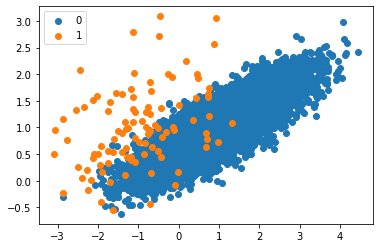

In [565]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    pyplot.legend()
pyplot.show()

In [566]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


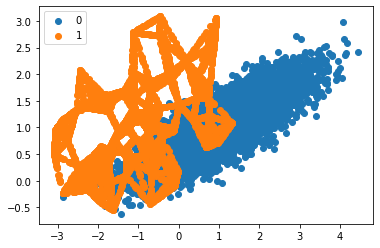

In [567]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [568]:

from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test= tts (X,y,train_size=0.7,test_size=0.3,random_state=100)

In [569]:
# Importing random forest Regressor from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfr = RandomForestClassifier()

In [570]:
rfr.fit(X_train,y_train)

RandomForestClassifier()

In [571]:
y_pred=rfr.predict(X_test)

In [572]:
# classification metrics
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2909  150]
 [ 126 2755]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3059
           1       0.95      0.96      0.95      2881

    accuracy                           0.95      5940
   macro avg       0.95      0.95      0.95      5940
weighted avg       0.95      0.95      0.95      5940



In [573]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9535353535353536
